## Data Aggregation

Aggregation operations generally involve the following steps:

1. Split the dataFrame into groups
2. Apply a function to each group
3. Combine the results into one data structure


In [1]:
# aggregation using a loop
import pandas as pd

happiness2015 = pd.read_csv("world-happiness-2015.csv")

mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

mean_happiness    

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

### GroupBy

pandas provides a `groupby` operation which condenses this into 2 steps:

1. Create a `GroupBy` object
2. Call a function of the `GroupBy` object

The `GroupBy` object maps groups to the original dataframe which makes operations faster and more efficient.

In [2]:
# Using groupby

grouped = happiness2015.groupby("Region")
aus_nz = grouped.get_group("Australia and New Zealand")
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [3]:
# map of group names to original dataframe row indexes, in the GroupBy object:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [4]:
# verify row indexes 
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Pandas common aggregation methods:

- `mean()` Calculates the mean of groups.
- `sum()` Calculates the sum of group values.
- `size()` Calculates the size of the groups.
- `count()` Calculates the count of values in groups.
- `min()` Calculates the minimum of group values.
- `max()` Calculates the maximum of group values.


In [5]:
# calculate mean happiness score by region
grouped = happiness2015.groupby("Region")
grouped["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [6]:
# Perform multiple aggregation functions at once with `agg([func1, func2])`
import numpy as np
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean, np.min, np.max])

,mean,amin,amax
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253
Sub-Saharan Africa,4.202800,2.839,5.477


In [7]:
# this also works
happiness2015.groupby("Region")["Happiness Score"].agg(["mean", "min", "max"])

,mean,min,max
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253
Sub-Saharan Africa,4.202800,2.839,5.477


In [8]:
# using a custom agg function, the object is automatically passed to the func

def percentage_of_max(group):
    return round((group.mean() / group.max()) * 100)

happiness2015.groupby("Region")["Happiness Score"].agg([percentage_of_max])

,percentage_of_max
Region,
Australia and New Zealand,100.0
Central and Eastern Europe,82.0
Eastern Asia,89.0
Latin America and Caribbean,85.0
Middle East and Northern Africa,74.0
North America,98.0
Southeastern Asia,78.0
Southern Asia,87.0
Sub-Saharan Africa,77.0


In [9]:
# using a custom agg function, the object is automatically passed to the func

def percentage_of_max(group):
    return round((group.mean() / group.max()) * 100)

happiness2015.groupby("Region")["Happiness Score"].agg([percentage_of_max])

,percentage_of_max
Region,
Australia and New Zealand,100.0
Central and Eastern Europe,82.0
Eastern Asia,89.0
Latin America and Caribbean,85.0
Middle East and Northern Africa,74.0
North America,98.0
Southeastern Asia,78.0
Southern Asia,87.0
Sub-Saharan Africa,77.0


pandas provides a `groupby` operation which condenses this into 2 steps:

1. Create a `GroupBy` object
2. Call a function of the `GroupBy` object

The `GroupBy` object maps groups to the original dataframe which makes operations faster and more efficient.

In [10]:
# Using groupby

grouped = happiness2015.groupby("Region")
aus_nz = grouped.get_group("Australia and New Zealand")
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [11]:
# map of group names to original datafram row indexes, in the GroupBy object:
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

In [12]:
# verify row indexes 
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


Pandas common aggregation methods:

- `mean()` Calculates the mean of groups.
- `sum()` Calculates the sum of group values.
- `size()` Calculates the size of the groups.
- `count()` Calculates the count of values in groups.
- `min()` Calculates the minimum of group values.
- `max()` Calculates the maximum of group values.


In [13]:
# calculate mean happiness score by region
grouped = happiness2015.groupby("Region")
grouped["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [14]:
# Perform multiple aggregation functions at once with `agg([func1, func2])`
import numpy as np
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean, np.min, np.max])

,mean,amin,amax
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253
Sub-Saharan Africa,4.202800,2.839,5.477


In [15]:
# this also works
happiness2015.groupby("Region")["Happiness Score"].agg(["mean", "min", "max"])

,mean,min,max
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253
Sub-Saharan Africa,4.202800,2.839,5.477


In [16]:
# using a custom agg function, the object is automatically passed to the func

def percentage_of_max(group):
    return round((group.mean() / group.max()) * 100)

happiness2015.groupby("Region")["Happiness Score"].agg([percentage_of_max])

,percentage_of_max
Region,
Australia and New Zealand,100.0
Central and Eastern Europe,82.0
Eastern Asia,89.0
Latin America and Caribbean,85.0
Middle East and Northern Africa,74.0
North America,98.0
Southeastern Asia,78.0
Southern Asia,87.0
Sub-Saharan Africa,77.0


### Pivot Tables

- In the above `GroupBy` example the `index` was "Region" and the value column was 
"Happiness Score"
- `df.pivot_table()` accepts these arguments and can perform the same type of data aggregation
- Using this method can make the code for complex aggregations easier to read
- By default, `df.pivot_table()` calculates the mean of the value column

In [ ]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

In [ ]:
# pivot table, margins=True applies agg function to the entire column - ie the 'All' value 
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness

In [ ]:
pv_happiness.plot(kind="barh", title="Mean happiness by region", xlim=(0,10), legend=False)

In [ ]:
# Pivot table allows aggregation of multiple columns, and multiple functions, at once, with aggfunc=
happiness2015.pivot_table(["Happiness Score", "Family"], "Region", aggfunc=[np.mean, np.min, np.max], margins=True)

### Data Aggregation: Overview

#### Syntax

---

##### GROUPBY OBJECTS

- Create a GroupBy object:
```python
df.groupby('col_to_groupby')
```
- Select one column from a GroupBy object:
```python
df.groupby('col_to_groupby')['col_selected']
```
- Select multiple columns from a GroupBy object:
```python
df.groupby('col_to_groupby')[['col_selected1', 'col_selected2']]
```

---

##### COMMON AGGREGATION METHODS
- `mean()`: Calculates the mean of groups
- `sum()`: Calculates the sum of group values
- `size()`: Calculates the size of groups
- `count()`: Calculates the count of values in groups
- `min()`: Calculates the minimum of group values
- `max()`: Calculates the maximum of group values

--- 

##### `GROUPBY.AGG()` METHOD

- Apply one function to a GroupBy object:
```python
df.groupby('col_to_groupby').agg(function_name)
```
- Apply multiple functions to a GroupBy object:
```python
df.groupby('col_to_groupby').agg([function_name1, function_name2, function_name3])
```
- Apply a custom function to a GroupBy object:
```python
df.groupby('col_to_groupby').agg(custom_function)
```

---

##### AGGREGATION WITH THE `DATAFRAME.PIVOT_TABLE` METHOD

- Apply only one function:
```python
df.pivot_table(values='Col_to_aggregate', index='Col_to_group_by', aggfunc=function_name)
```
- Apply multiple functions:
```python
df.pivot_table('Col_to_aggregate', 'Col_to_group_by', aggfunc=[function_name1, function_name2, function_name3])
```
- Aggregate multiple columns:
```python
df.pivot_table(['Col_to_aggregate1', 'Col_to_aggregate2'], 'Col_to_group_by', aggfunc = function_name)
```
- Calculate the grand total for the aggregation column:
```python
df.pivot_table('Col_to_aggregate', 'Col_to_group_by', aggfunc=function_name, margins=True)
```

#### Concepts

- **Aggregation** is applying a statistical operation to groups of data. It reduces dimensionality so that the dataframe returned will contain just one value for each group. The aggregation process can be broken down into three steps:
   - Split the dataframe into groups.
   - Apply a function to each group.
   - Combine the results into one data structure. 
   
- The `groupby` operation optimizes the split-apply-combine process. It can be broken down into two steps:
   - Create a GroupBy object.
   - Call an aggregation function.
   
- Creating the GroupBy object is an intermediate step that allows us to optimize our work. It contains information on how to group the dataframe, but nothing is actually computed until a function is called.

- The `DataFrame.pivot_table()` method can also be used to aggregate data. We can also use it to calculate the grand total for the aggregation column.

In [17]:
### Data Aggregation: Overview

#### Syntax

---

##### GROUPBY OBJECTS

- Create a GroupBy object:
```python
df.groupby('col_to_groupby')
```
- Select one column from a GroupBy object:
```python
df.groupby('col_to_groupby')['col_selected']
```
- Select multiple columns from a GroupBy object:
```python
df.groupby('col_to_groupby')[['col_selected1', 'col_selected2']]
```

---

##### COMMON AGGREGATION METHODS
- `mean()`: Calculates the mean of groups
- `sum()`: Calculates the sum of group values
- `size()`: Calculates the size of groups
- `count()`: Calculates the count of values in groups
- `min()`: Calculates the minimum of group values
- `max()`: Calculates the maximum of group values

--- 

##### `GROUPBY.AGG()` METHOD

- Apply one function to a GroupBy object:
```python
df.groupby('col_to_groupby').agg(function_name)
```
- Apply multiple functions to a GroupBy object:
```python
df.groupby('col_to_groupby').agg([function_name1, function_name2, function_name3])
```
- Apply a custom function to a GroupBy object:
```python
df.groupby('col_to_groupby').agg(custom_function)
```

---

##### AGGREGATION WITH THE `DATAFRAME.PIVOT_TABLE` METHOD

- Apply only one function:
```python
df.pivot_table(values='Col_to_aggregate', index='Col_to_group_by', aggfunc=function_name)
```
- Apply multiple functions:
```python
df.pivot_table('Col_to_aggregate', 'Col_to_group_by', aggfunc=[function_name1, function_name2, function_name3])
```
- Aggregate multiple columns:
```python
df.pivot_table(['Col_to_aggregate1', 'Col_to_aggregate2'], 'Col_to_group_by', aggfunc = function_name)
```
- Calculate the grand total for the aggregation column:
```python
df.pivot_table('Col_to_aggregate', 'Col_to_group_by', aggfunc=function_name, margins=True)
```

#### Concepts

- **Aggregation** is applying a statistical operation to groups of data. It reduces dimensionality so that the dataframe returned will contain just one value for each group. The aggregation process can be broken down into three steps:
   - Split the dataframe into groups.
   - Apply a function to each group.
   - Combine the results into one data structure. 
   
- The `groupby` operation optimizes the split-apply-combine process. It can be broken down into two steps:
   - Create a GroupBy object.
   - Call an aggregation function.
   
- Creating the GroupBy object is an intermediate step that allows us to optimize our work. It contains information on how to group the dataframe, but nothing is actually computed until a function is called.

- The `DataFrame.pivot_table()` method can also be used to aggregate data. We can also use it to calculate the grand total for the aggregation column.

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


In [31]:
# pivot table, margins=True applies agg function to the entire column - ie the 'All' value 
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


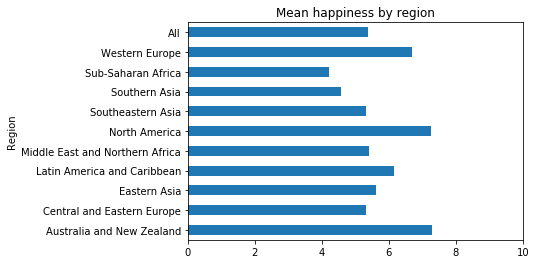

In [30]:
pv_happiness.plot(kind="barh", title="Mean happiness by region", xlim=(0,10), legend=False)

In [35]:
# Pivot table allows aggregation of multiple columns, and multiple functions, at once, with aggfunc=
happiness2015.pivot_table(["Happiness Score", "Family"], "Region", aggfunc=[np.mean, np.min, np.max], margins=True)

mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

### Data Aggregation: Summary

#### Syntax

---

##### GROUPBY OBJECTS

- Create a GroupBy object:
```python
df.groupby('col_to_groupby')
```
- Select one column from a GroupBy object:
```python
df.groupby('col_to_groupby')['col_selected']
```
- Select multiple columns from a GroupBy object:
```python
df.groupby('col_to_groupby')[['col_selected1', 'col_selected2']]
```

---

##### COMMON AGGREGATION METHODS
- `mean()`: Calculates the mean of groups
- `sum()`: Calculates the sum of group values
- `size()`: Calculates the size of groups
- `count()`: Calculates the count of values in groups
- `min()`: Calculates the minimum of group values
- `max()`: Calculates the maximum of group values

--- 

##### `GROUPBY.AGG()` METHOD

- Apply one function to a GroupBy object:
```python
df.groupby('col_to_groupby').agg(function_name)
```
- Apply multiple functions to a GroupBy object:
```python
df.groupby('col_to_groupby').agg([function_name1, function_name2, function_name3])
```
- Apply a custom function to a GroupBy object:
```python
df.groupby('col_to_groupby').agg(custom_function)
```

---

##### AGGREGATION WITH THE `DATAFRAME.PIVOT_TABLE` METHOD

- Apply only one function:
```python
df.pivot_table(values='Col_to_aggregate', index='Col_to_group_by', aggfunc=function_name)
```
- Apply multiple functions:
```python
df.pivot_table('Col_to_aggregate', 'Col_to_group_by', aggfunc=[function_name1, function_name2, function_name3])
```
- Aggregate multiple columns:
```python
df.pivot_table(['Col_to_aggregate1', 'Col_to_aggregate2'], 'Col_to_group_by', aggfunc = function_name)
```
- Calculate the grand total for the aggregation column:
```python
df.pivot_table('Col_to_aggregate', 'Col_to_group_by', aggfunc=function_name, margins=True)
```

#### Concepts

- **Aggregation** is applying a statistical operation to groups of data. It reduces dimensionality so that the dataframe returned will contain just one value for each group. The aggregation process can be broken down into three steps:
   - Split the dataframe into groups.
   - Apply a function to each group.
   - Combine the results into one data structure. 
   
- The `groupby` operation optimizes the split-apply-combine process. It can be broken down into two steps:
   - Create a GroupBy object.
   - Call an aggregation function.
   
- Creating the GroupBy object is an intermediate step that allows us to optimize our work. It contains information on how to group the dataframe, but nothing is actually computed until a function is called.

- The `DataFrame.pivot_table()` method can also be used to aggregate data. We can also use it to calculate the grand total for the aggregation column.